## Data Visualization

In this section we will visualize and interpret the most important attributes of the data set.  We will also explore relationships between attributes in order to gain insight into how the variables might help explain the response variable 'project_is_approved'.

In [4]:
#import dataset
import pandas as pd
import numpy as np
df_train = pd.read_csv('DMProj1/train.csv')
df_resources = pd.read_csv('DMProj1/resources.csv')
df_resources['Total_cost'] = df_resources.quantity * df_resources.price
train_resource = pd.merge(df_train, df_resources, on="id", how='left')
#https://www.kaggle.com/codename007/a-very-extensive-end-to-end-project-donorschoose
## Merging with train and test data ##
train_resource = pd.merge(df_train, df_resources, on="id", how='left')

Total_cost = train_resource.pivot_table(values=['Total_cost','quantity'],
                                        index='id',
                                        aggfunc={'Total_cost' : np.sum, 'quantity' : np.sum})
Total_cost.reset_index(level=0, inplace = True)

df_train = df_train.merge(Total_cost, on='id', how='left')
df_train['Average_item_cost'] = df_train.Total_cost  / df_train.quantity
df_train['proj_submitted_count'] = 1
date_features = ['project_submitted_datetime']
df_train[date_features] = df_train[date_features].astype('datetime64[ns]')
df_train['project_submitted_YM'] = df_train['project_submitted_datetime'].apply(lambda x: x.strftime('%Y%m'))
##df_train.info()

Before diving into the relationships let's get familiar with the response variable that we wish to predict, 'project_is_approved'

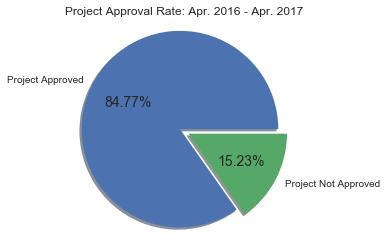

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

aprvd = float(len(df_train[df_train.project_is_approved != 0]))/len(df_train) * 100
Naprvd = float(len(df_train[df_train.project_is_approved== 0]))/len(df_train) * 100

##https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Project Approved', 'Project Not Approved'
sizes = [aprvd, Naprvd]
#colors = ['xkcd:teal', 'xkcd:grey']
explode = (0.0,0.1)  
plt.rcParams['font.size'] = 14.0

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=360)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Project Approval Rate: Apr. 2016 - Apr. 2017')
plt.show()

The pie chart above looks at project approval rates across the entire time period of the dataset provided.  We see that the approval rate is high, with only 15% of project submissions declined.  

This suggests that the submission process was set-up only to weed out applications that were not applicable to the overall mission of donorschoose.org, and perhaps even to act as a filter to discourage fraudulent applications. 

Next we will look at the approval rate by the year and month of the application submission.

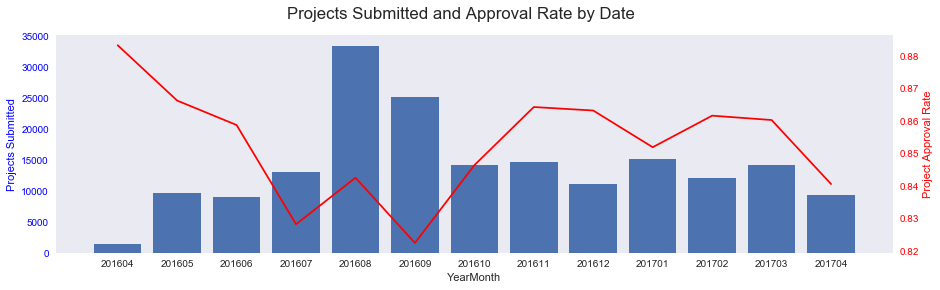

In [9]:
#https://stackoverflow.com/questions/32474434/trying-to-plot-a-line-plot-on-a-bar-plot-using-matplotlib
projSub = df_train.pivot_table(values=['proj_submitted_count','project_is_approved'],
                                        index='project_submitted_YM',
                                        aggfunc={'proj_submitted_count' : np.sum
                                               , 'project_is_approved' : np.sum})
projSub.reset_index(level=0, inplace = True)

projSub['proj_approval_rate'] = (projSub.project_is_approved/projSub.proj_submitted_count)
del projSub['project_is_approved']

date = projSub.project_submitted_YM  
projSubmitted = projSub.proj_submitted_count
projApprvdRate = projSub.proj_approval_rate

#Plot graph with 2 y axes
fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.suptitle('Projects Submitted and Approval Rate by Date')

#Plot bars
#projSubmitted.plot()
plt.bar(date,projSubmitted)
ax1.set_xlabel('YearMonth')
ax1.grid(False)

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Projects Submitted', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
plt.plot(date,projApprvdRate, color = 'r')
ax2.grid(False)

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('Project Approval Rate', color='r')
[tl.set_color('r') for tl in ax2.get_yticklabels()]
plt.show()

The chart above shows how the approval rate fluctuated over the thirteen month time period.  The blue bars represent submission volume and the red line represents the approval rate within the same month.  The range of the approval rate axis is intentionally small in order to focus on the changes by month.  Note that the total range of approval rates is only 6% during the thirteen month period.

The submission volumes peaked in August and September, a time when most teachers are returning from summer break.  The dip in approval rates during this same time period may be caused be a lack of resources on the reviewers' side, i.e., they may become slightly more strict with the applications as a result of increased submission volume.  

Another possibility is that there is a lagged time component where the glut of new applications aren't fully reviewed and decisioned until one or two months after the applications were submitted.  Approval rates rose in October and November.  This may be due to the residual volume from August and September being processed.

Now we will turn our attention towards the state the school is located.

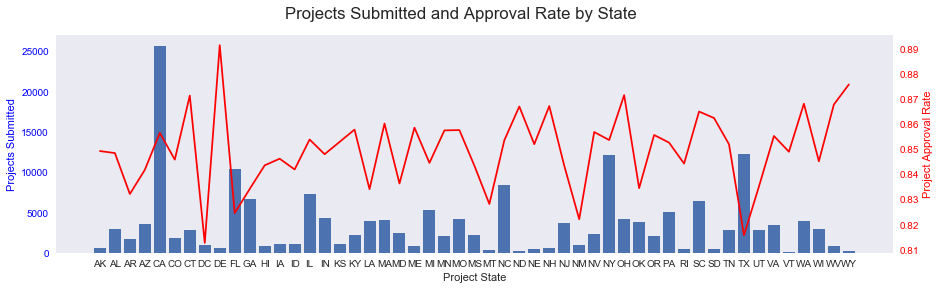

,school_state,proj_submitted_count,proj_approval_rate
8,DE,589,0.891341
50,WY,177,0.875706
35,OH,4139,0.871467
6,CT,2766,0.871294
47,WA,3903,0.868050


In [18]:
projState = df_train.pivot_table(values=['proj_submitted_count','project_is_approved'],
                                        index='school_state',
                                        aggfunc={'proj_submitted_count' : np.sum
                                               , 'project_is_approved' : np.sum})
projState.reset_index(level=0, inplace = True)

projState['proj_approval_rate'] = (projState.project_is_approved/projState.proj_submitted_count)
del projState['project_is_approved']

state = projState.school_state  
projSubmitted = projState.proj_submitted_count
projApprvdRate = projState.proj_approval_rate

#Plot graph with 2 y axes
fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.suptitle('Projects Submitted and Approval Rate by State')

#Plot bars
#projSubmitted.plot()
plt.bar(state,projSubmitted)
ax1.set_xlabel('Project State')
ax1.grid(False)

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Projects Submitted', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
plt.plot(state,projApprvdRate, color = 'red')
ax2.grid(False)

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('Project Approval Rate', color='r')
[tl.set_color('r') for tl in ax2.get_yticklabels()]
plt.show()
#sort table
projState = projState.sort_values('proj_approval_rate',ascending=False)
projState.head()

In [16]:
projState.tail()

,school_state,proj_submitted_count,proj_approval_rate
26,MT,384,0.828125
9,FL,10359,0.824500
32,NM,916,0.822052
43,TX,12304,0.815670
7,DC,902,0.812639


The chart above shows project submission volume and approval rates by state. The two tables show the top five states by approval rate (top table) and the bottom five states by approval rate (bottom table).  One overlay that may be very interesting for future analysis would be to try to determine the driver of the differences in approvals rates between the top and bottom five states.  Is this difference purely random, or is it statistically significant?  Demographic features from these states could potentially be useful in answering this question.

Let's now turn our attention to the quantities requested and see if that could cause a difference in approval rates.

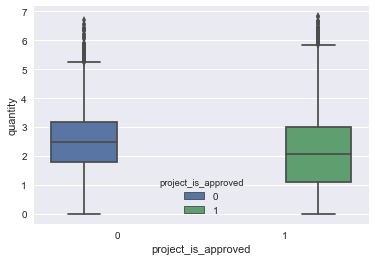

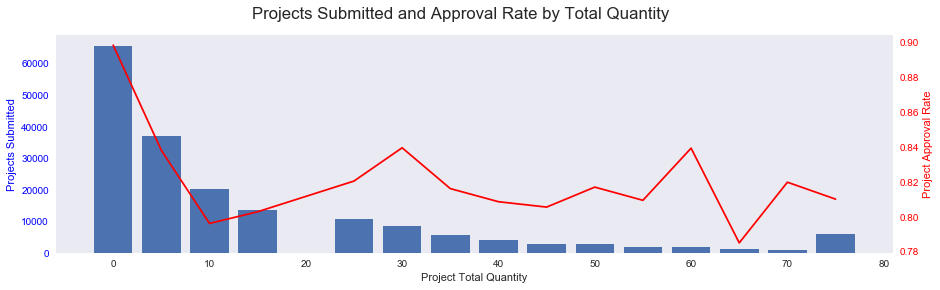

In [19]:
##boxplot quantity by is_approved
sns.boxplot(x="project_is_approved", 
            y=df_train["quantity"].apply(np.log),
            hue="project_is_approved",
 data=df_train)

##bar and line plot quantity by is_approved
df_train['total_quantity_group'] = pd.cut(df_train['quantity']
                                      , bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,1e6]
                                      , labels = [0,5,10,15,25,30,35,40,45,50,55,60,65,70,75])
df_train['total_quantity_group'] = df_train['total_quantity_group'].astype(np.int64)

projQuant = df_train.pivot_table(values=['proj_submitted_count','project_is_approved'],
                                        index='total_quantity_group',
                                        aggfunc={'proj_submitted_count' : np.sum
                                               , 'project_is_approved' : np.sum})
projQuant.reset_index(level=0, inplace = True)

projQuant['proj_approval_rate'] = (projQuant.project_is_approved/projQuant.proj_submitted_count)
del projQuant['project_is_approved']
quant = projQuant.total_quantity_group  
projSubmitted = projQuant.proj_submitted_count
projApprvdRate = projQuant.proj_approval_rate

#Plot graph with 2 y axes
fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.suptitle('Projects Submitted and Approval Rate by Total Quantity')

#Plot bars
plt.bar(quant,projSubmitted, width = 4)
ax1.set_xlabel('Project Total Quantity')
ax1.grid(False)

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Projects Submitted', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
plt.plot(quant,projApprvdRate, color = 'red')
ax2.grid(False)

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('Project Approval Rate', color='r')
[tl.set_color('r') for tl in ax2.get_yticklabels()]
plt.show()

The chart directly above shows projects submitted and approval rates by the quantity of materials requested.  The box plot above the chart is a log transform of the quantity requested split between applications that were approved and not approved.

The box plot does not show a radical difference in terms of quantity requested between applications that were approved and applications that were not approved.  One difference, however, is the lower quartile range of approved applications.  This suggests that applications that request lower quanties have a better chance of being approved.  This is furthered by the chart where there does seem to be a negative correlation between increases in quantity and the likelyhood of an application being approved.  We will revisit the correlations and address them directly at the end of this section.

Next we will look at the same analysis as above, but for total cost instead of quantity.

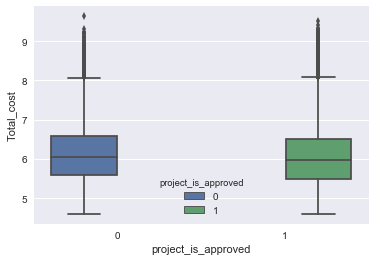

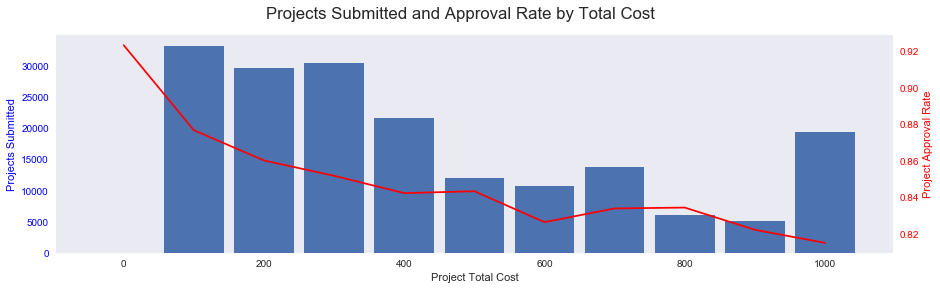

In [21]:
##boxplot total cost by is_approved
sns.boxplot(x="project_is_approved", 
            y=df_train["Total_cost"].apply(np.log),
            hue="project_is_approved",
 data=df_train)

df_train['total_cost_group'] = pd.cut(df_train['Total_cost']
                                      , bins = [0,100,200,300,400,500,600,700
                                                ,800,900,1000,1e6]
                                      ,labels = [0,100,200,300,400,500,600,700
                                                ,800,900,1000])
df_train['total_cost_group'] = df_train['total_cost_group'].astype(np.int64)

projCost = df_train.pivot_table(values=['proj_submitted_count','project_is_approved'],
                                        index='total_cost_group',
                                        aggfunc={'proj_submitted_count' : np.sum
                                               , 'project_is_approved' : np.sum})
projCost.reset_index(level=0, inplace = True)

projCost['proj_approval_rate'] = (projCost.project_is_approved/projCost.proj_submitted_count)
del projCost['project_is_approved']

cost = projCost.total_cost_group  
#print(state)
projSubmitted = projCost.proj_submitted_count
#print(projSubmitted)
projApprvdRate = projCost.proj_approval_rate
#print(projApprvdRate)

#Plot graph with 2 y axes
fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.suptitle('Projects Submitted and Approval Rate by Total Cost')

#Plot bars
#projSubmitted.plot()
plt.bar(cost,projSubmitted, width = 85)
ax1.set_xlabel('Project Total Cost')
ax1.grid(False)

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Projects Submitted', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
plt.plot(cost,projApprvdRate, color = 'red')
ax2.grid(False)

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('Project Approval Rate', color='r')
[tl.set_color('r') for tl in ax2.get_yticklabels()]
plt.show()

The chart directly above shows projects submitted and approval rates by the total cost of materials requested.  The box plot above the chart is a log transform of the total cost split between applications that were approved and not approved.

As with the box plot for quantity, the box plot for total cost does not show a radical difference in terms of quantity requested between applications that were approved and applications that were not approved. In fact, the box plots look almost identical.  

However, in the chart directly above there does seem to be a negative correlation between increases in total cost and the likelyhood of an application being approved.  As with the quantity variable, we will revisit the correlations and address them directly at the end of this section.

Now we will focus on the grade level taught by the teacher who submitted the application(s).

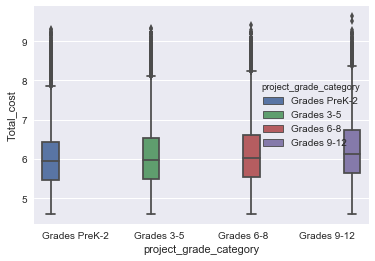

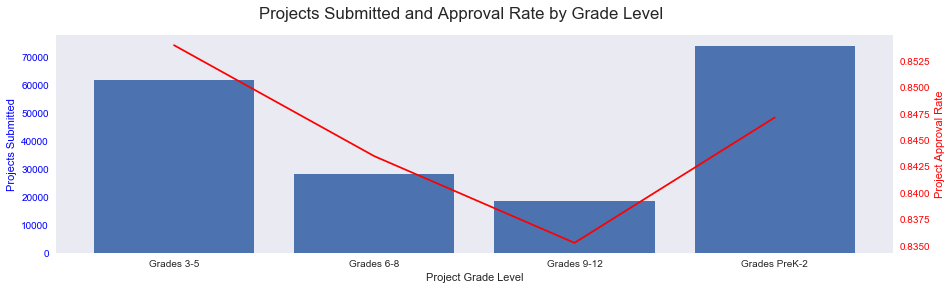

In [22]:
##boxplot quantity by is_approved
sns.boxplot(x="project_grade_category", 
            y=df_train["Total_cost"].apply(np.log),
            hue="project_grade_category",
 data=df_train)

projGrade = df_train.pivot_table(values=['proj_submitted_count','project_is_approved'],
                                        index='project_grade_category',
                                        aggfunc={'proj_submitted_count' : np.sum
                                               , 'project_is_approved' : np.sum})
projGrade.reset_index(level=0, inplace = True)

projGrade['proj_approval_rate'] = (projGrade.project_is_approved/projGrade.proj_submitted_count)
del projGrade['project_is_approved']

grade = projGrade.project_grade_category  
projSubmitted = projGrade.proj_submitted_count
projApprvdRate = projGrade.proj_approval_rate

#Plot graph with 2 y axes
fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.suptitle('Projects Submitted and Approval Rate by Grade Level')

#Plot bars
#projSubmitted.plot()
plt.bar(grade,projSubmitted)
ax1.set_xlabel('Project Grade Level')
ax1.grid(False)

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Projects Submitted', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
plt.plot(grade,projApprvdRate, color = 'red')
ax2.grid(False)

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('Project Approval Rate', color='r')
[tl.set_color('r') for tl in ax2.get_yticklabels()]
plt.show()

The chart directly above shows projects submitted and approval rates by grade level.  Note that the highest number of submissions comes from grades pre-kindergarten through second - while the highest approval rates are for grades three through five.  The higher approval rates for grades three through five may be caused by a 'Goldilocks' effect, where donors and also reviewers of the applications subconsciously conclude that children of this age are 'just right' for learning (but also still cute little kids).  Intuitively, people may often think of this as a golden age of childhood development and therefore be more willing to approve an application and donate towards their needs.

Total cost, however, may be a confounding factor when analyzing approval rates by grade.  It would not be unreasonable to posit that smaller chilren require less expensive resources in their education - and that it is actually the lower cost of materials that drives the higher approval rates (recall from earlier that cost and approval rates appeared to be negatively correlated).

In the final analysis for this section we will consider approval rates by the number of projects previously submitted.

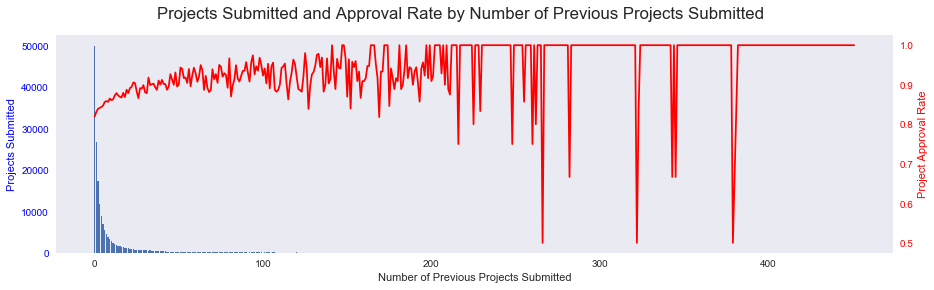

In [24]:
projPrev = df_train.pivot_table(values=['proj_submitted_count','project_is_approved'],
                                        index='teacher_number_of_previously_posted_projects',
                                        aggfunc={'proj_submitted_count' : np.sum
                                               , 'project_is_approved' : np.sum})
projPrev.reset_index(level=0, inplace = True)

projPrev['proj_approval_rate'] = (projPrev.project_is_approved/projPrev.proj_submitted_count)
del projPrev['project_is_approved']

prev = projPrev.teacher_number_of_previously_posted_projects  
#print(state)
projSubmitted = projPrev.proj_submitted_count
#print(projSubmitted)
projApprvdRate = projPrev.proj_approval_rate
#print(projApprvdRate)

#Plot graph with 2 y axes
fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.suptitle('Projects Submitted and Approval Rate by Number of Previous Projects Submitted')

#Plot bars
#projSubmitted.plot()
plt.bar(prev,projSubmitted)
ax1.set_xlabel('Number of Previous Projects Submitted')
ax1.grid(False)

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Projects Submitted', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#Set up ax2 to be the second y axis with x shared
ax2 = ax1.twinx()
plt.plot(prev,projApprvdRate, color = 'red')
ax2.grid(False)

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('Project Approval Rate', color='r')
[tl.set_color('r') for tl in ax2.get_yticklabels()]
plt.show()

The chart above shows projects submitted and approval rates by number of previous projects submitted.  Approval rates increase as teachers gain more experience with the application process.  This is not surprising, but was included in this analysis to display the extreme right skew for this variable.  As with the correlations between quantity and total cost, this will be examined more closely in the next section.

### Summary

Some important insights have been gained from this analysis.  Overall approval rates are high, and the chances of an application being approved are increased for those who request lower quantities and lower total costs in their applications.  Furthermore, teachers of lower grade levels have a better possibility of having their applications accepted when compared to teachers in the upper grade levels.  Volume of total applications submitted also increases the likelyhood of acceptance.  Timing may also be a factor for approval, although a data set that contained a longer time period would be helpful to perform further analysis for this.  Finally, teachers in certain states seem to have better overall odds of application acceptance.  As mentioned earlier, it would be interesting to overlay additional socio-economic attributes to see if this can help to add more insight into the differences amongst states.